In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Data is from Kaggle.com: https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml



## Features
1. id: Record identifier
2. log_price: log(price) [ the logarithm used is natural log]
3. ... : 25 features for the listing 

## Evaluation 
the evaluation metric for the competitoin is the Root Mean Squared Error (RMSE) score

In [2]:
bnb_df = pd.read_csv("Data/train.csv")


In [3]:
bnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
bnb_df.shape

(74111, 29)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

Short checklist to keep in mind:

1. What question(s) are you trying to solve?

create a model that predicts the variable "log_price"

2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
# check for null values
bnb_df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
bnb_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
bnb_df['accommodates'].value_counts()

2     31854
4     12066
1      9434
3      7794
6      4969
5      3444
8      1795
7       946
10      701
16      301
9       270
12      264
14      104
11       79
15       54
13       36
Name: accommodates, dtype: int64

In [9]:
bnb_df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


In [154]:
# create a function that graphs sns correlation heatmap
def sns_corr_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(15,12))
    sns.heatmap(corr_matrix,
               annot=True,
               fmt='.2f',
               cmap="Blues")

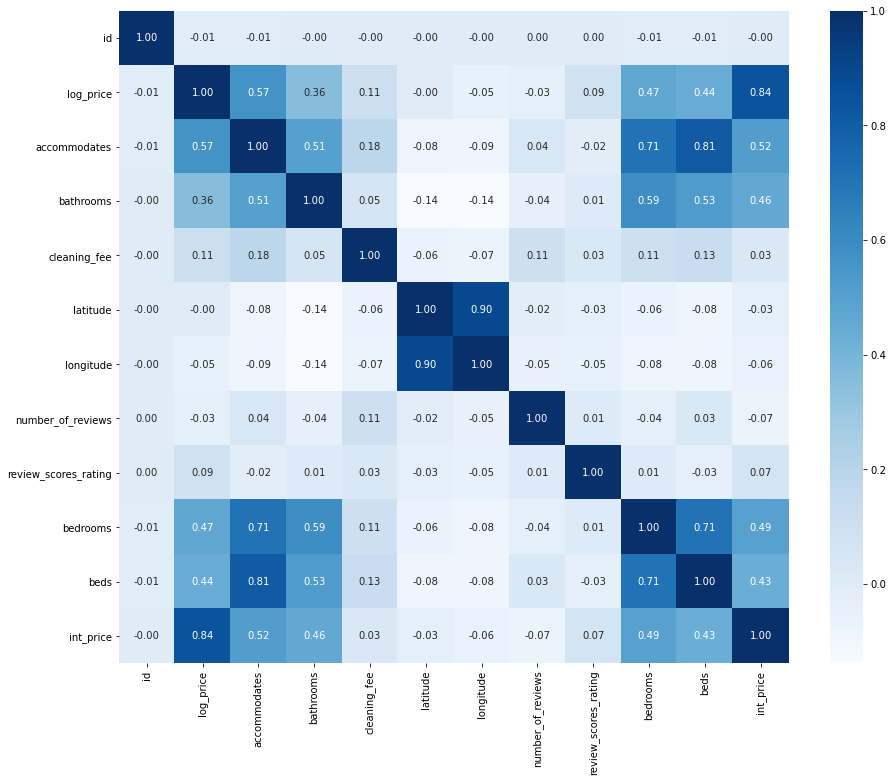

In [155]:
# Create a correlation matrix using seaborn's heatmap
sns_corr_heatmap(bnb_df)


Text(0, 0.5, 'Log Price')

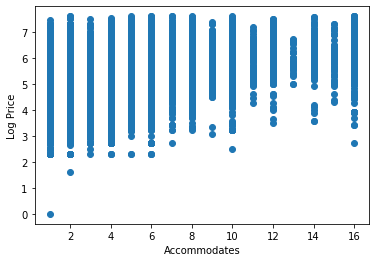

In [11]:
# compare accommodates with the log price (target variable)
plt.scatter(bnb_df['accommodates'], bnb_df['log_price'])
plt.xlabel("Accommodates")
plt.ylabel("Log Price")

In [12]:
bnb_df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [13]:
bnb_df['bedrooms'].value_counts()

1.0     49784
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: bedrooms, dtype: int64

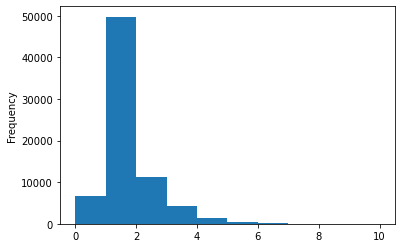

In [14]:
bnb_df['bedrooms'].plot(kind='hist')

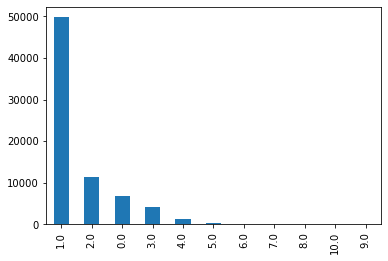

In [15]:
# compare bedrooms with log_price
bnb_df['bedrooms'].value_counts().plot(kind="bar")

In [16]:
bnb_df.head(2).T

,0,1
id,6901257,6304928
log_price,5.01064,5.1299
property_type,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche..."
accommodates,3,7
bathrooms,1,1
bed_type,Real Bed,Real Bed
cancellation_policy,strict,strict
cleaning_fee,True,True


In [17]:
# convert log price to unit price
bnb_df['int_price'] = np.exp(bnb_df['log_price'])

In [18]:
# sort dataset by host_since
bnb_df.sort_values(by='host_since')['host_since'].head()

72898    2008-03-03
48876    2008-03-04
24742    2008-04-21
68396    2008-06-27
7461     2008-07-11
Name: host_since, dtype: object

In [19]:
bnb_df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
int_price     

In [20]:
bnb_df['host_since'] = pd.to_datetime(bnb_df['host_since'])
bnb_df['last_review'] = pd.to_datetime(bnb_df['last_review'])
bnb_df['first_review'] = pd.to_datetime(bnb_df['first_review'])

In [21]:
bnb_df.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review                      object
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                object
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_ra

In [22]:
bnb_df['host_since'].dt.month

0         3.0
1         6.0
2        10.0
3         4.0
4         3.0
         ... 
74106     3.0
74107     5.0
74108     1.0
74109     9.0
74110    11.0
Name: host_since, Length: 74111, dtype: float64

#### converting string columns into numerical values


https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/general_utility_functions.html#data-types-related-functionality


turn into categories to access all data in the form of numbers

In [23]:
# Test codes
pd.api.types.is_object_dtype(bnb_df['city'])

True

In [24]:
bnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,int_price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0


In [25]:
for label, content in bnb_df.items():
    if pd.api.types.is_object_dtype(bnb_df[label]):
        # print(label)
        bnb_df[label] = content.astype('category').cat.as_ordered()


In [26]:
# check if changes are made
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  category      
 3   room_type               74111 non-null  category      
 4   amenities               74111 non-null  category      
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  category      
 8   cancellation_policy     74111 non-null  category      
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  category      
 11  description             74111 non-null  category      
 12  first_review            58247 non-null  catego

In [27]:
bnb_df['neighbourhood'].cat.categories

Index(['16th Street Heights', 'Adams Morgan', 'Alamo Square', 'Albany Park',
       'Alhambra', 'Allerton', 'Allston-Brighton', 'Alondra Park',
       'Alphabet City', 'Altadena',
       ...
       'Winnetka', 'Winthrop', 'Woodhaven', 'Woodland',
       'Woodland Hills/Warner Center', 'Woodlawn', 'Woodley Park', 'Woodridge',
       'Woodside', 'Wrigleyville'],
      dtype='object', length=619)

In [28]:
bnb_df['neighbourhood'].cat.codes

0         77
1        252
2        247
3        325
4        119
        ... 
74106    605
74107    255
74108    605
74109    592
74110    319
Length: 74111, dtype: int16

In [29]:
print(bnb_df['neighbourhood'].nunique())
print(bnb_df['neighbourhood'].cat.codes.nunique())

619
620


In [30]:
# check over dataset again
bnb_df.head(2).T

,0,1
id,6901257,6304928
log_price,5.01064,5.1299
property_type,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche..."
accommodates,3,7
bathrooms,1,1
bed_type,Real Bed,Real Bed
cancellation_policy,strict,strict
cleaning_fee,True,True


#### Find the missing zipcodes using its lat and long values

In [57]:
!pip install uszipcode

You should consider upgrading via the 'c:\users\smartestpersonalive\anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
from uszipcode import Zipcode, SearchEngine
search = SearchEngine(simple_zipcode=True)

In [33]:
bnb_df['zipcode'].isnull().sum()

966

In [120]:
# make a copy
bnb_df1 = bnb_df.copy()

In [121]:
bnb_df[bnb_df1['zipcode'].isnull()]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,int_price
26,19407360,4.553877,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Pool,Kitchen,""Elevator...",2,1.0,Real Bed,flexible,True,...,-118.364204,Retro West Hollywood Studio + Pool!,NaN,1,100.0,https://a0.muscache.com/im/pictures/c67ecdec-a...,NaN,1.0,1.0,95.0
96,4576821,4.248495,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,Breakfast,Elevato...",1,1.0,Real Bed,flexible,True,...,-73.977079,Charming Studio in Park Slope,Park Slope,2,100.0,https://a0.muscache.com/im/pictures/6666b75f-4...,NaN,0.0,1.0,70.0
189,7144212,4.828314,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,True,...,-74.007225,Private room in Amazing Lux building!,Financial District,3,100.0,https://a0.muscache.com/im/pictures/e05d4db6-2...,NaN,1.0,1.0,125.0
401,19839317,7.569412,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3.5,Real Bed,super_strict_60,True,...,-118.373981,Modern Luxury: 116852,NaN,1,100.0,NaN,NaN,3.0,3.0,1938.0
497,11742647,3.891820,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,-73.913570,Good Living in Brooklyn! Dbl Rm,Bushwick,66,96.0,https://a0.muscache.com/im/pictures/b143c05f-d...,NaN,1.0,2.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73642,13465498,3.761200,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,False,...,-73.911694,Location Little Marina ( only for girls),Astoria,3,93.0,NaN,NaN,1.0,1.0,43.0
73763,17300316,4.174387,House,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Futon,flexible,True,...,-76.987303,Private Room! Bike to Share! Cat to Pet!,NaN,1,100.0,https://a0.muscache.com/im/pictures/ad7476d7-4...,NaN,1.0,1.0,65.0
73925,10575811,5.010635,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",6,1.0,Real Bed,flexible,True,...,-118.150099,Delightful Duplex,NaN,19,99.0,https://a0.muscache.com/im/pictures/150c7a64-b...,NaN,2.0,3.0,150.0
74060,19102281,5.075174,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,-73.986541,Cosy 1 bdr in Midtown West,Hell's Kitchen,10,96.0,https://a0.muscache.com/im/pictures/e4f7eb56-a...,NaN,1.0,1.0,160.0


In [122]:
bnb_df1['zipcode'].astype(str).iloc[26]

'nan'

In [123]:
# FIND ALL ZIPCODES WITH MISSING VALUES AND SET THEM TO 0 
# change datatype back to object
bnb_df1['zipcode'] = bnb_df1['zipcode'].astype(str)
bnb_df1.loc[(bnb_df1['zipcode'] == ' ') |
            (bnb_df1['zipcode'] == "nan"),'zipcode'] = 0

In [124]:
display(bnb_df1.loc[bnb_df1['zipcode'] == 0].head())
display(bnb_df1.loc[bnb_df1['zipcode'] == 0].tail())


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,int_price
26,19407360,4.553877,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Pool,Kitchen,""Elevator...",2,1.0,Real Bed,flexible,True,...,-118.364204,Retro West Hollywood Studio + Pool!,NaN,1,100.0,https://a0.muscache.com/im/pictures/c67ecdec-a...,0,1.0,1.0,95.0
96,4576821,4.248495,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,Breakfast,Elevato...",1,1.0,Real Bed,flexible,True,...,-73.977079,Charming Studio in Park Slope,Park Slope,2,100.0,https://a0.muscache.com/im/pictures/6666b75f-4...,0,0.0,1.0,70.0
189,7144212,4.828314,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,True,...,-74.007225,Private room in Amazing Lux building!,Financial District,3,100.0,https://a0.muscache.com/im/pictures/e05d4db6-2...,0,1.0,1.0,125.0
340,5586306,4.499810,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,False,...,-76.994113,Stylish one bedroom+ near redline,NaN,98,94.0,https://a0.muscache.com/im/pictures/b7049541-c...,0,1.0,1.0,90.0
401,19839317,7.569412,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3.5,Real Bed,super_strict_60,True,...,-118.373981,Modern Luxury: 116852,NaN,1,100.0,NaN,0,3.0,3.0,1938.0


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,int_price
73642,13465498,3.761200,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,False,...,-73.911694,Location Little Marina ( only for girls),Astoria,3,93.0,NaN,0,1.0,1.0,43.0
73763,17300316,4.174387,House,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Futon,flexible,True,...,-76.987303,Private Room! Bike to Share! Cat to Pet!,NaN,1,100.0,https://a0.muscache.com/im/pictures/ad7476d7-4...,0,1.0,1.0,65.0
73925,10575811,5.010635,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",6,1.0,Real Bed,flexible,True,...,-118.150099,Delightful Duplex,NaN,19,99.0,https://a0.muscache.com/im/pictures/150c7a64-b...,0,2.0,3.0,150.0
74060,19102281,5.075174,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,-73.986541,Cosy 1 bdr in Midtown West,Hell's Kitchen,10,96.0,https://a0.muscache.com/im/pictures/e4f7eb56-a...,0,1.0,1.0,160.0
74083,15423281,5.010635,Apartment,Private room,"{TV,""Wireless Internet"",Kitchen,""Smoke detecto...",2,1.0,Real Bed,flexible,False,...,-122.423192,Charming bedroom in the heart of Russian Hill,Russian Hill,0,NaN,https://a0.muscache.com/im/pictures/c76fa898-4...,0,1.0,1.0,150.0


In [125]:
missing_zipcode_list =bnb_df1.loc[bnb_df1['zipcode'] == 0, 'zipcode'].index.to_list()
missing_zipcode_list[:5]

[26, 96, 189, 340, 401]

In [126]:
%%time
empty_list

for i in missing_zipcode_list:
    
    some_lat = bnb_df1.iloc[i]['latitude']
    some_long = bnb_df.iloc[i]['longitude']
    # append the lat,lng values into a list for future reference
    empty_list.append(search.by_coordinates(some_lat,some_long, radius=30, returns=2)[0].zipcode)
    
    # store coordinates in a variable
    coords = search.by_coordinates(some_lat, some_long, radius=30, returns=2)[0].zipcode

    # change missing zipcodes with newly determined value
    bnb_df1['zipcode'][i] = coords

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Wall time: 51 s


In [127]:
# check if changes are made
bnb_df1.iloc[26]['zipcode']

'90046'

In [128]:
# check missing data (in percentages)
round((bnb_df.isnull().sum() / len(bnb_df) *100),2)

id                         0.00
log_price                  0.00
property_type              0.00
room_type                  0.00
amenities                  0.00
accommodates               0.00
bathrooms                  0.27
bed_type                   0.00
cancellation_policy        0.00
cleaning_fee               0.00
city                       0.00
description                0.00
first_review              21.41
host_has_profile_pic       0.25
host_identity_verified     0.25
host_response_rate        24.69
host_since                 0.25
instant_bookable           0.00
last_review               21.36
latitude                   0.00
longitude                  0.00
name                       0.00
neighbourhood              9.27
number_of_reviews          0.00
review_scores_rating      22.56
thumbnail_url             11.09
zipcode                    1.30
bedrooms                   0.12
beds                       0.18
int_price                  0.00
dtype: float64

In [129]:
# change zipcode column back to category datatype
bnb_df1['zipcode'] = bnb_df1['zipcode'].astype('category').cat.as_ordered()

#### Edit host_response_rate (get rid of percentage sign)

In [130]:
bnb_df1['host_response_rate'] = bnb_df1['host_response_rate'].str.replace("%", "")

In [131]:
# change host_response_rate column back to category datatype
bnb_df1['host_response_rate'] = bnb_df1['host_response_rate'].astype("category").cat.as_ordered()

#### Create a copy

In [132]:
bnb_df2 = bnb_df1.copy()

## Fill missing values

#### Fill numerical missing values

also create a binary column to indicate whether values were missing or not. This is important for feature engineering which is contructing features in the data that don't explicitly exist. 

In [133]:
bnb_df2.dtypes

id                                 int64
log_price                        float64
property_type                   category
room_type                       category
amenities                       category
accommodates                       int64
bathrooms                        float64
bed_type                        category
cancellation_policy             category
cleaning_fee                        bool
city                            category
description                     category
first_review                    category
host_has_profile_pic            category
host_identity_verified          category
host_response_rate              category
host_since                datetime64[ns]
instant_bookable                category
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                            category
neighbourhood                   category
number_of_reviews                  int64
review_scores_ra

In [134]:
bnb_df2.head(2).T

,0,1
id,6901257,6304928
log_price,5.01064,5.1299
property_type,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche..."
accommodates,3,7
bathrooms,1,1
bed_type,Real Bed,Real Bed
cancellation_policy,strict,strict
cleaning_fee,True,True


In [135]:
# if dtype is numeric then print the "labels"
for label, content in bnb_df2.items():
    if pd.api.types.is_numeric_dtype(bnb_df2[label]):
        if bnb_df2[label].isnull().sum() > 0:
            # add a vinary column that tells us if the data was missing
            bnb_df2[f"{label}_is_missing"] = pd.isnull(bnb_df2[label])
            # Fill missing numeric values with median
            bnb_df2[label] = bnb_df2[label].fillna(bnb_df2[label].median())
            
            # print columns with null values (which columns were the changes made on)
            print(label)
        
        


bathrooms
review_scores_rating
bedrooms
beds


In [136]:
# check to see if there are still any null numeric values (should output nothing
for label, content in bnb_df2.items():
    if pd.api.types.is_numeric_dtype(bnb_df2[label]):
        if bnb_df2[label].isnull().sum() > 0:
            print(label)

In [137]:
bnb_df2.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'int_price', 'bathrooms_is_missing', 'review_scores_rating_is_missing',
       'bedrooms_is_missing', 'beds_is_missing'],
      dtype='object')

In [138]:
bnb_df2['review_scores_rating_is_missing'].value_counts()

False    57389
True     16722
Name: review_scores_rating_is_missing, dtype: int64

In [139]:
# still have missing values in the dataset
bnb_df2.isnull().sum()

id                                     0
log_price                              0
property_type                          0
room_type                              0
amenities                              0
accommodates                           0
bathrooms                              0
bed_type                               0
cancellation_policy                    0
cleaning_fee                           0
city                                   0
description                            0
first_review                       15864
host_has_profile_pic                 188
host_identity_verified               188
host_response_rate                 18299
host_since                           188
instant_bookable                       0
last_review                        15827
latitude                               0
longitude                              0
name                                   0
neighbourhood                       6872
number_of_reviews                      0
review_scores_ra

In [140]:
bnb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               74111 non-null  int64         
 1   log_price                        74111 non-null  float64       
 2   property_type                    74111 non-null  category      
 3   room_type                        74111 non-null  category      
 4   amenities                        74111 non-null  category      
 5   accommodates                     74111 non-null  int64         
 6   bathrooms                        74111 non-null  float64       
 7   bed_type                         74111 non-null  category      
 8   cancellation_policy              74111 non-null  category      
 9   cleaning_fee                     74111 non-null  bool          
 10  city                             74111 non-null  category 

In [141]:
pd.Categorical(bnb_df1['property_type']).codes

array([0, 0, 0, ..., 0, 0, 2], dtype=int8)

In [142]:
# select the cateogircal columns (select if not numeric)
for label, content, in bnb_df2.items():
    if not pd.api.types.is_numeric_dtype(bnb_df2[label]):
        # add a binary column to indicate whether sample has missing value
        bnb_df2[f"{label}_is_missing"] = pd.isnull(bnb_df2[label])
        # turn categories into numbers and add +1
        bnb_df2[label] = pd.Categorical(content).codes + 1
        # show cateogircal labels:
        print(label)

property_type
room_type
amenities
bed_type
cancellation_policy
city
description
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
instant_bookable
last_review
name
neighbourhood
thumbnail_url
zipcode


In [143]:
bnb_df1.head(2).T

,0,1
id,6901257,6304928
log_price,5.01064,5.1299
property_type,Apartment,Apartment
room_type,Entire home/apt,Entire home/apt
amenities,"{""Wireless Internet"",""Air conditioning"",Kitche...","{""Wireless Internet"",""Air conditioning"",Kitche..."
accommodates,3,7
bathrooms,1,1
bed_type,Real Bed,Real Bed
cancellation_policy,strict,strict
cleaning_fee,True,True


In [144]:
# check for missing values now
bnb_df2.isnull().sum()

id                                   0
log_price                            0
property_type                        0
room_type                            0
amenities                            0
accommodates                         0
bathrooms                            0
bed_type                             0
cancellation_policy                  0
cleaning_fee                         0
city                                 0
description                          0
first_review                         0
host_has_profile_pic                 0
host_identity_verified               0
host_response_rate                   0
host_since                           0
instant_bookable                     0
last_review                          0
latitude                             0
longitude                            0
name                                 0
neighbourhood                        0
number_of_reviews                    0
review_scores_rating                 0
thumbnail_url            

In [147]:
# change column (host_response_rate) to host_response_rate_pct
bnb_df2.rename(columns={"host_response_rate":"host_response_rate_pct"}, inplace=True)

In [151]:
bnb_df2.shape

(74111, 52)

## Build machine learning model (Regression)
build a ML model now that missing data are taken care of

Find patterns in the data to predict the price

In [152]:
bnb_df2.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_has_profile_pic_is_missing,host_identity_verified_is_missing,host_response_rate_is_missing,host_since_is_missing,instant_bookable_is_missing,last_review_is_missing,name_is_missing,neighbourhood_is_missing,thumbnail_url_is_missing,zipcode_is_missing
0,6901257,5.010635,1,1,6143,3,1.0,5,3,True,...,False,False,True,False,False,False,False,False,False,False
1,6304928,5.129899,1,1,6270,7,1.0,5,3,True,...,False,False,False,False,False,False,False,False,False,False


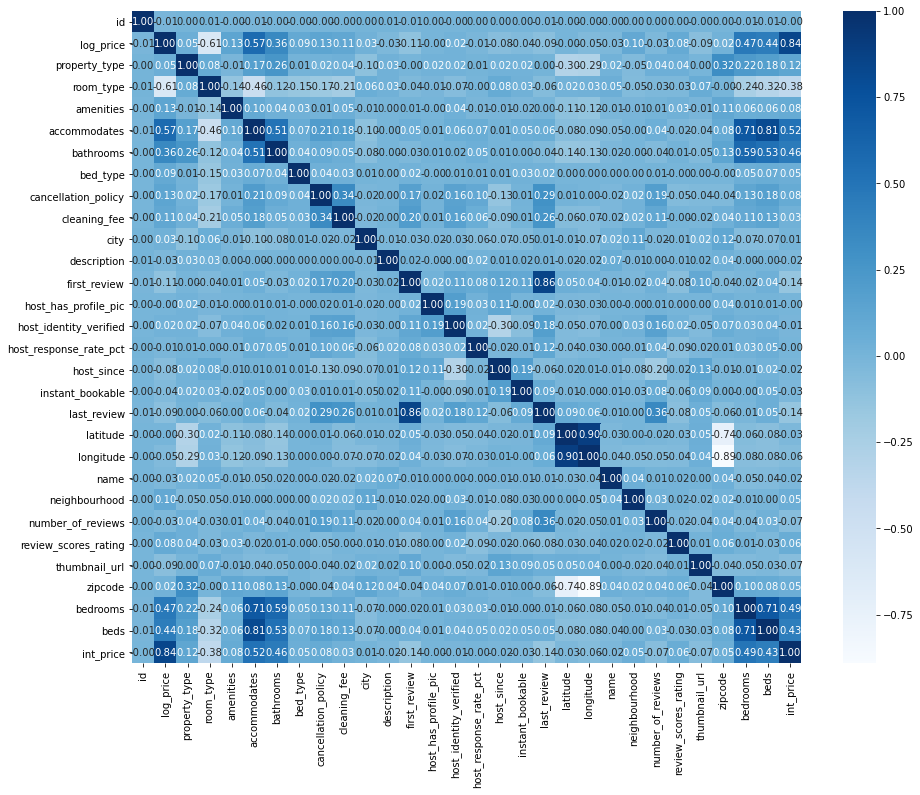

In [207]:
# use predefined function to create heatmap
sns_corr_heatmap(bnb_df2.iloc[:,:30])


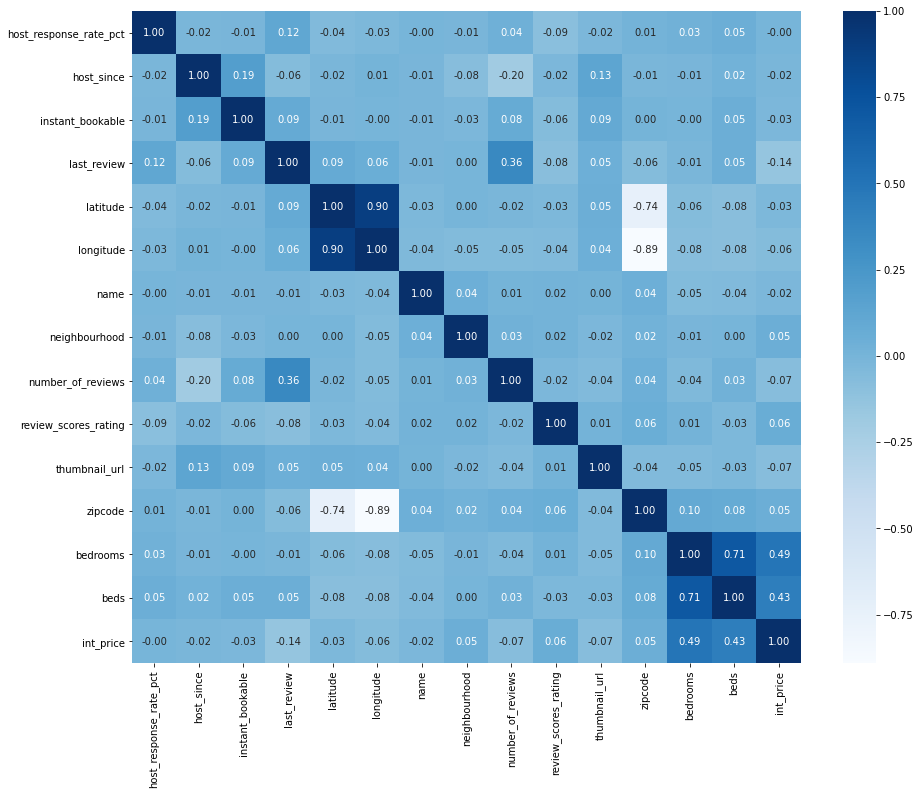

In [174]:
sns_corr_heatmap(bnb_df2.iloc[:, 15:30])

In [161]:
bnb_df2.columns.tolist().index("bathrooms_is_missing")

30

In [168]:
bnb_df2.iloc[:,:30].head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,int_price
0,6901257,5.010635,1,1,6143,3,1.0,5,3,True,...,-73.991617,10465,78,2,100.0,32399,202,1.0,1.0,150.0
1,6304928,5.129899,1,1,6270,7,1.0,5,3,True,...,-73.989040,65673,253,6,93.0,16221,74,3.0,3.0,169.0
2,7919400,4.976734,1,1,21346,5,1.0,5,2,True,...,-73.943756,66397,248,10,92.0,32853,85,1.0,3.0,145.0
3,13418779,6.620073,18,1,38855,4,1.0,5,1,True,...,-122.431619,9388,326,0,96.0,33693,762,2.0,2.0,750.0
4,3808709,4.744932,1,1,55414,2,1.0,5,2,True,...,-77.034596,32069,120,4,40.0,0,350,0.0,1.0,115.0


In [163]:
bnb_df2.columns.tolist()

['id',
 'log_price',
 'property_type',
 'room_type',
 'amenities',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate_pct',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'thumbnail_url',
 'zipcode',
 'bedrooms',
 'beds',
 'int_price',
 'bathrooms_is_missing',
 'review_scores_rating_is_missing',
 'bedrooms_is_missing',
 'beds_is_missing',
 'property_type_is_missing',
 'room_type_is_missing',
 'amenities_is_missing',
 'bed_type_is_missing',
 'cancellation_policy_is_missing',
 'city_is_missing',
 'description_is_missing',
 'first_review_is_missing',
 'host_has_profile_pic_is_missing',
 'host_identity_verified_is_missing',
 'host_response_rate_is_missing',
 'host_since_is_missing',
 'instant_bookable_is_missing',
 'last_review_is_missing

#### Try the ridge regression model 

In [208]:
# just ignore int_price for now
bnb_df2.drop('int_price', axis=1, inplace=True)

In [210]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


# setup random seed
np.random.seed(42)

# Create the data
X = bnb_df2.drop('log_price', axis=1)
y = bnb_df2['log_price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


# Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55174e-19): result may not be accurate.
  overwrite_a=True).T


0.5614262315567364

#### Try Random Forest Regressor


In [214]:
from sklearn.ensemble import RandomForestRegressor

# Set up Random seed
np.random.seed(42)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test,y_test)

0.7035600680335106

without doing any hyperparameter tuning, randomForestRegressor already improved the model

## making predictions using a machine learning model